# Анализ товарного ассортимента

Менеджер проекта интернет-магазина товаров для дома «Пока все ещё тут» обратился в отдел аналитики, чтобы провести полноценный анализ продаж и товарного ассортимента.

Цель проекта — проанализировать историю продаж и оптимизировать закупки товаров с помощью определения основного и дополнительного ассортимента.

Задачи:
- провести исследовательский анализ данных;
- проанализировать торговый ассортимент;
- сформулировать и проверить статистические гипотезы;
- предложить рекомендации по оптимизации ассортимента.

## Изучение и предобработка данных

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/ecommerce_dataset.csv')

Структура ecommerce_dataset.csv:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

In [3]:
display(df.sample(10, random_state=1))

,date,customer_id,order_id,product,quantity,price
6338,2019091614,545f2b2b-795c-4162-956c-34909dca09b1,72652,Терка для сыра Comfortline из нержавеющей стал...,1,1274.0
2255,2019030909,1a32c1a4-5862-4896-8671-fa4c1ffcf0c4,70666,"Сумка-тележка TWIN стальной каркас 56 л серая,...",1,2549.0
1470,2019011013,4dde5428-a8c3-4547-a828-427734519307,69767,Набор вешалок деревянных 3 шт с перекладиной 4...,3,352.0
3229,2019042716,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,томата (помидор) Пурпурная страсть № 101 сорт ...,1,38.0
1768,2019021012,bd74b48f-17ea-45f7-8c66-510665aad57f,70187,Искусственный цветок Ландыш пластиковый малый ...,12,20.0
4337,2019060219,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0
2645,2019040410,eeec96e6-88f0-4d11-a100-0b3971840412,14614,"Бакопа ампельная мега-крупная белая объем 0,5 л",1,82.0
3354,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,Декабрист в горшке D12 белый с розовой каймой,1,139.0
1548,2019011910,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см красная махровая,1,188.0
2922,2019041622,d4f984b6-ea59-4618-a26f-79a053e483c7,14653,томата (помидор) Ильди №35 сорт детерминантный...,1,38.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
df.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [6]:
df.duplicated().sum()

0

Пропусков и дубликатов нет, названия стобцов корректные, необходимо привести данные в столбце 'date' к корректным значениям, а также значения в столбце 'product' к нижнему регистру.

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df['product'] = df['product'].str.lower()

In [8]:
display(df.sample(10, random_state=1))

,date,customer_id,order_id,product,quantity,price
6338,2019-09-16 14:00:00,545f2b2b-795c-4162-956c-34909dca09b1,72652,терка для сыра comfortline из нержавеющей стал...,1,1274.0
2255,2019-03-09 09:00:00,1a32c1a4-5862-4896-8671-fa4c1ffcf0c4,70666,"сумка-тележка twin стальной каркас 56 л серая,...",1,2549.0
1470,2019-01-10 13:00:00,4dde5428-a8c3-4547-a828-427734519307,69767,набор вешалок деревянных 3 шт с перекладиной 4...,3,352.0
3229,2019-04-27 16:00:00,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,томата (помидор) пурпурная страсть № 101 сорт ...,1,38.0
1768,2019-02-10 12:00:00,bd74b48f-17ea-45f7-8c66-510665aad57f,70187,искусственный цветок ландыш пластиковый малый ...,12,20.0
4337,2019-06-02 19:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"рассада патиссона сорт нло белый, кассета по 6шт",1,120.0
2645,2019-04-04 10:00:00,eeec96e6-88f0-4d11-a100-0b3971840412,14614,"бакопа ампельная мега-крупная белая объем 0,5 л",1,82.0
3354,2019-05-02 16:00:00,760aa067-90c3-4794-b7a9-a8831197388b,14715,декабрист в горшке d12 белый с розовой каймой,1,139.0
1548,2019-01-19 10:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,пеларгония зональная диам. 12 см красная махровая,1,188.0
2922,2019-04-16 22:00:00,d4f984b6-ea59-4618-a26f-79a053e483c7,14653,томата (помидор) ильди №35 сорт детерминантный...,1,38.0


Найдём минимальную и максимальную даты.

In [9]:
print('Минимальная дата:', df['date'].min())
print('Максимальная дата:',df['date'].max())

Минимальная дата: 2018-10-01 00:00:00
Максимальная дата: 2019-10-31 16:00:00


Данные в таблицы за 13 месяцев.

Добавим новые столбцы:
- revenue - выручку по каждой проданной позиции;
- order_month - месяц даты заказа;
- order_date - дата заказа.

In [10]:
df['revenue'] = df['quantity'] * df['price']
df['order_month'] = df['date'].astype('datetime64[M]')
df['order_date'] = df['date'].dt.date
display(df.sample(10, random_state=1))

,date,customer_id,order_id,product,quantity,price,revenue,order_month,order_date
6338,2019-09-16 14:00:00,545f2b2b-795c-4162-956c-34909dca09b1,72652,терка для сыра comfortline из нержавеющей стал...,1,1274.0,1274.0,2019-09-01,2019-09-16
2255,2019-03-09 09:00:00,1a32c1a4-5862-4896-8671-fa4c1ffcf0c4,70666,"сумка-тележка twin стальной каркас 56 л серая,...",1,2549.0,2549.0,2019-03-01,2019-03-09
1470,2019-01-10 13:00:00,4dde5428-a8c3-4547-a828-427734519307,69767,набор вешалок деревянных 3 шт с перекладиной 4...,3,352.0,1056.0,2019-01-01,2019-01-10
3229,2019-04-27 16:00:00,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,томата (помидор) пурпурная страсть № 101 сорт ...,1,38.0,38.0,2019-04-01,2019-04-27
1768,2019-02-10 12:00:00,bd74b48f-17ea-45f7-8c66-510665aad57f,70187,искусственный цветок ландыш пластиковый малый ...,12,20.0,240.0,2019-02-01,2019-02-10
4337,2019-06-02 19:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"рассада патиссона сорт нло белый, кассета по 6шт",1,120.0,120.0,2019-06-01,2019-06-02
2645,2019-04-04 10:00:00,eeec96e6-88f0-4d11-a100-0b3971840412,14614,"бакопа ампельная мега-крупная белая объем 0,5 л",1,82.0,82.0,2019-04-01,2019-04-04
3354,2019-05-02 16:00:00,760aa067-90c3-4794-b7a9-a8831197388b,14715,декабрист в горшке d12 белый с розовой каймой,1,139.0,139.0,2019-05-01,2019-05-02
1548,2019-01-19 10:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,пеларгония зональная диам. 12 см красная махровая,1,188.0,188.0,2019-01-01,2019-01-19
2922,2019-04-16 22:00:00,d4f984b6-ea59-4618-a26f-79a053e483c7,14653,томата (помидор) ильди №35 сорт детерминантный...,1,38.0,38.0,2019-04-01,2019-04-16


Проверим корректность выгрузки данных с помощью следующих критериев:
- уникальному номеру заказу соответствует уникальный идентификатор покупателя (т.е. у заказа не должно быть 2 и более покупателей);
- уникальному номеру заказу соответствует уникальная дата заказа (т.е. у заказа не должно быть 2 и более даты заказа).

In [11]:
df.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1').count()

customer_id    29
dtype: int64

In [12]:
nunique_customers_per_order = df.groupby('order_id').agg({'customer_id': 'nunique'}).reset_index()
incorrect_orders_A = nunique_customers_per_order[nunique_customers_per_order['customer_id'] > 1]['order_id']
incorrect_orders_A

248     14872
516     68785
797     69283
817     69310
832     69345
862     69410
902     69485
933     69531
1066    69833
1200    70114
1443    70542
1495    70631
1542    70726
1581    70808
1631    70903
1651    70946
1712    71054
1799    71226
1905    71461
1914    71480
1939    71542
1956    71571
2000    71648
2004    71663
2269    72188
2569    72778
2576    72790
2610    72845
2677    72950
Name: order_id, dtype: int64

Проверим, верно ли мы определели ошибочные заказы на примере заказа 14872.

In [13]:
df.query('order_id == 14872')

,date,customer_id,order_id,product,quantity,price,revenue,order_month,order_date
5518,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния махровая в кассете...,2,82.0,164.0,2019-06-01,2019-06-21
5519,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния простая в кассете ...,1,82.0,82.0,2019-06-01,2019-06-21
5520,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,петуния махровая рассада однолетних цветов в к...,1,128.0,128.0,2019-06-01,2019-06-21
5545,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния махровая в кассете...,2,82.0,164.0,2019-06-01,2019-06-22
5546,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния простая в кассете ...,1,82.0,82.0,2019-06-01,2019-06-22
5547,2019-06-22 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,петуния махровая рассада однолетних цветов в к...,1,128.0,128.0,2019-06-01,2019-06-22
5549,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,однолетнее растение петуния махровая в кассете...,2,82.0,164.0,2019-06-01,2019-06-24
5550,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,однолетнее растение петуния простая в кассете ...,1,82.0,82.0,2019-06-01,2019-06-24
5551,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,петуния махровая рассада однолетних цветов в к...,1,128.0,128.0,2019-06-01,2019-06-24


Как мы видим, было сделано 3 заказа в разные даты. Состав каждого заказа одинаковый - 3 позиции:
- 21.06.2019 был сделан заказ пользователем '4e861452-b692-48dc-b756-99a130b7a70a';
- 22.06.2019 был сделан заказ тем же самым пользователем '4e861452-b692-48dc-b756-99a130b7a70a';
- 24.06.2019 был сделан заказ другим пользователем '9897ccd6-9441-4886-b709-b06361fabf6c'.

Поэтому для чистоты данных удалим 29 заказов с двумя и более покупателями.

In [14]:
df = df.loc[~df['order_id'].isin(incorrect_orders_A)]

In [15]:
df.groupby('order_id').agg({'date': 'nunique'}).query('date > 1').count()

date    256
dtype: int64

In [16]:
df.groupby('order_id').agg({'date': 'nunique'}).query('date > 1')

,date
order_id,
13547,7
14500,4
14504,2
14505,2
14521,6
...,...
73101,2
73104,3
73108,2


Проверим, верно ли мы определели ошибочные заказы на примере заказа 14504.

In [17]:
df.query('order_id == 14504')

,date,customer_id,order_id,product,quantity,price,revenue,order_month,order_date
650,2018-11-05 22:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни душицы в горшке диам....,1,101.0,101.0,2018-11-01,2018-11-05
651,2018-11-05 22:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни мелиссы в горшке диам...,1,101.0,101.0,2018-11-01,2018-11-05
652,2018-11-05 22:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни розмарина в горшке ди...,1,101.0,101.0,2018-11-01,2018-11-05
653,2018-11-05 22:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни тимьяна в горшке диам...,1,101.0,101.0,2018-11-01,2018-11-05
656,2018-11-06 07:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни душицы в горшке диам....,1,101.0,101.0,2018-11-01,2018-11-06
657,2018-11-06 07:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни мелиссы в горшке диам...,1,101.0,101.0,2018-11-01,2018-11-06
658,2018-11-06 07:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни розмарина в горшке ди...,1,101.0,101.0,2018-11-01,2018-11-06
659,2018-11-06 07:00:00,9e2710d8-2a24-4dd2-86a5-bd5e4c5ebea8,14504,рассада зелени для кухни тимьяна в горшке диам...,1,101.0,101.0,2018-11-01,2018-11-06


Как мы видим, был сделан один и тот же заказ два раза - в разные даты. Состав каждого заказа одинаковый - 4 позиции:
- 05.11.2018 заказ был сделан в 22:00;
- 06.11.2018 заказ был сделан в 07:00.

Поэтому для чистоты данных у 256 заказов удалим дубликаты, оставив только самую раннюю дату.

In [18]:
first_date_of_orders = df.groupby('order_id').agg({'date': 'min'}).reset_index()
first_date_of_orders.columns = ['order_id', 'first_order_date']

In [19]:
df = pd.merge(df, first_date_of_orders, on='order_id')
df = df.loc[df['date'] == df['first_order_date']]

In [20]:
df.describe()

,order_id,quantity,price,revenue
count,4773.000000,4773.000000,4773.000000,4773.000000
mean,48003.515609,2.810392,515.174942,853.130526
std,27381.419042,17.743170,948.041666,9908.738346
min,12624.000000,1.000000,9.000000,9.000000
25%,14770.000000,1.000000,90.000000,120.000000
50%,68844.000000,1.000000,150.000000,191.000000
75%,70797.000000,1.000000,488.000000,734.000000
max,73164.000000,1000.000000,14917.000000,675000.000000


Большинство товаров (75%) покупают по 1 шт., но есть и выбросы в 1000 шт. в одном заказе. Предположим, что это мелкий опт или опт., т.к. для личного пользования такое количество не понадобится, а такие выбросы сильно влияют на среднее значение.
Возьмём границу в 100 шт., чтобы убрать аномальные значения.

In [21]:
df.query('quantity > 100')

,date,customer_id,order_id,product,quantity,price,revenue,order_month,order_date,first_order_date
233,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10-01,2018-10-11,2018-10-11 14:00:00
234,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,5700.0,2018-10-01,2018-10-11,2018-10-11 14:00:00
579,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,8670.0,2018-11-01,2018-11-01,2018-11-01 08:00:00
597,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,8260.0,2018-11-01,2018-11-02,2018-11-02 11:00:00
1169,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,5800.0,2018-12-01,2018-12-10,2018-12-10 14:00:00
2394,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,3000.0,2019-03-01,2019-03-23,2019-03-23 10:00:00
3962,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,15300.0,2019-05-01,2019-05-20,2019-05-20 21:00:00
5397,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,2019-06-01,2019-06-11,2019-06-11 07:00:00
5479,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,675000.0,2019-06-01,2019-06-18,2019-06-18 15:00:00


In [22]:
df = df.query('quantity <= 100').reset_index(drop=True)
df.describe()

,order_id,quantity,price,revenue
count,4764.000000,4764.000000,4764.000000,4764.000000
mean,47961.984257,2.271201,515.919395,692.271201
std,27390.518971,5.757534,948.742498,1532.852137
min,12624.000000,1.000000,9.000000,9.000000
25%,14770.000000,1.000000,90.000000,120.000000
50%,68844.000000,1.000000,150.000000,190.000000
75%,70794.500000,1.000000,488.000000,734.000000
max,73164.000000,100.000000,14917.000000,47385.000000


Убрали выбросы, средние по количеству и по выручке стали лучше.

In [23]:
round(4764 / 6737 * 100, 2)

70.71

Таким образом, из 6737 строк мы оставили только 4764. Это 70.71% от исходных данных.

### Вывод

На данном этапе были:
- изучены данные из исходного файла;
- проверены типы данных на корректность;
- пропусков в данных нет и полных дубликатов тоже;
- значения в столбце 'date' приведены к формату даты и времени;
- значения в столбце 'product' приведены к нижнему регистру;
- найдены минимальные и максимальная даты совершения заказов;
- данные были выгружены некорректно (есть заказы с двумя и более клиентами, а также с двумя и более датами их совершения); 
- после удаления лишних строк осталось около 70% от исходных данных.

## Исследовательский анализ данных

Посмотрим на количество уникальных клиентов, заказов и товаров.

In [24]:
print('Количество уникальных клиентов за период:', df['customer_id'].nunique())
print('Количество уникальных заказов за период:', df['order_id'].nunique())
print('Количество уникальных наименований товаров:', df['product'].nunique())
print('Общая сумма выручки за период:', df['revenue'].sum())

Количество уникальных клиентов за период: 2386
Количество уникальных заказов за период: 2747
Количество уникальных наименований товаров: 2322
Общая сумма выручки за период: 3297980.0


Посмотрим на выручку более подробно (по клиентам).

In [25]:
df.groupby('customer_id').agg({'revenue': 'sum', 'order_id': 'nunique'}).sort_values(by='revenue', ascending=False).head(10)

,revenue,order_id
customer_id,,
c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0,126
4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0,35
58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0,2
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0,4
8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0,1
6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0,1
1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0,1
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.0,1
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0,17


In [26]:
df.groupby('customer_id').agg({'revenue': 'sum', 'order_id': 'nunique'}).sort_values(by='revenue', ascending=False).tail(10)

,revenue,order_id
customer_id,,
d5660bff-407f-463d-b2ff-e90a9ca05976,22.0,1
48788184-498b-49da-955e-7737bf7c9047,22.0,1
21df03ad-d9ac-47e9-a482-5372fd3e2464,22.0,1
f31954cc-2f4d-4680-ab86-123de2aa7f56,22.0,1
f420bf6d-9985-47bc-95a7-5c640ad6d001,22.0,1
e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,22.0,1
eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,22.0,1
2330d859-e9cb-4c8f-abd0-55f9e27e6745,15.0,1
f32b5708-af61-42e7-baba-9f3759d87841,15.0,1


In [27]:
df.groupby('customer_id').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=False).head(10)

,order_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,126
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
b7b865ab-0735-407f-8d0c-31f74d2806cc,7
0184f535-b60a-4914-a982-231e3f615206,5
bea7a833-2074-42db-bc49-4457abd3c930,4
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
e0535076-6270-4df2-8621-cb06264a94fa,4
d02429ab-22e0-4ff2-9465-3082befde444,3


В основном, клиенты из топ-10 тратят до 60 000 у.е., на первом месте клиент, который купил товаров больше, чем клиенты на 2-4 местах вместе взятые. Но при этом этом он чаще всех остальных покупал (126 заказов).

В конце списка можно увидеть, что клиенты совершают по 1 заказу самых дешёвых товаров.

Посмотрим на изменение количества заказов и распределение выручки по месяцам.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


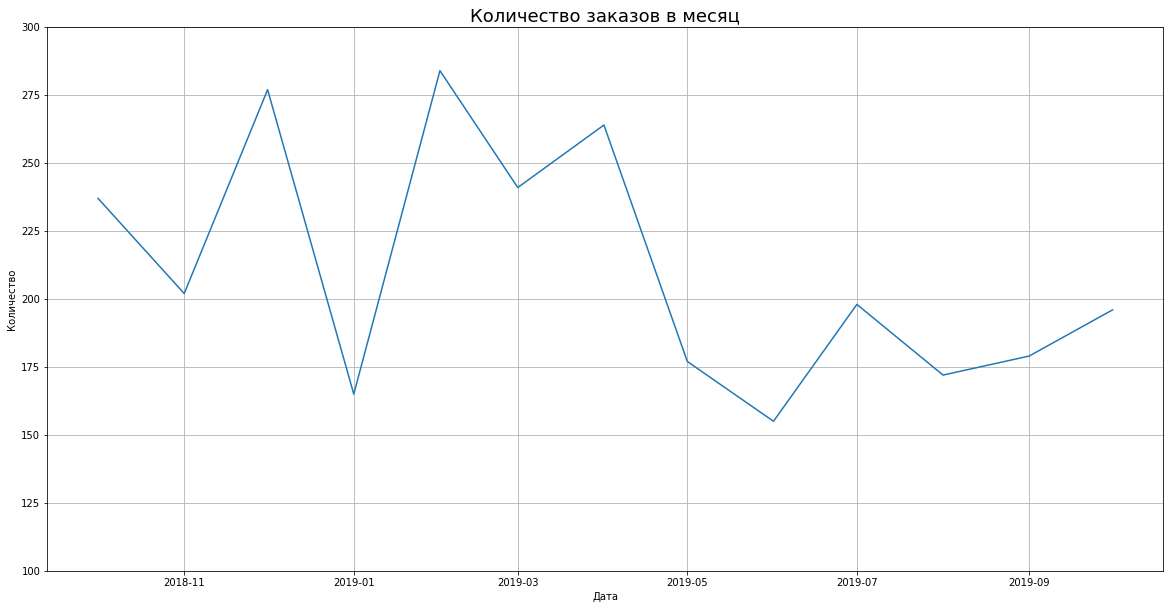

Среднее количество заказов в день: order_id    211.0
dtype: float64


In [28]:
plt.figure(figsize=(20,10))
a_plot = sns.lineplot(data=df.groupby('order_month').agg({'order_id': 'nunique'}).reset_index(), x="order_month", y="order_id")
plt.title('Количество заказов в месяц', fontsize=18)
plt.xlabel('Дата')
plt.ylabel('Количество')
a_plot.set(ylim=(100, 300))
plt.grid()
plt.show()
print('Среднее количество заказов в день:', round(df.groupby('order_month').agg({'order_id': 'nunique'}).reset_index().mean(), 0))

Наблюдается сезонность - в основном заказывают товары осенью и зимой (при этом в январе, после новогодних праздников резкий спад), начиная с середины весны и до середины осени наблюдается наименьшее количество заказов (люди на дачах и в отпусках).

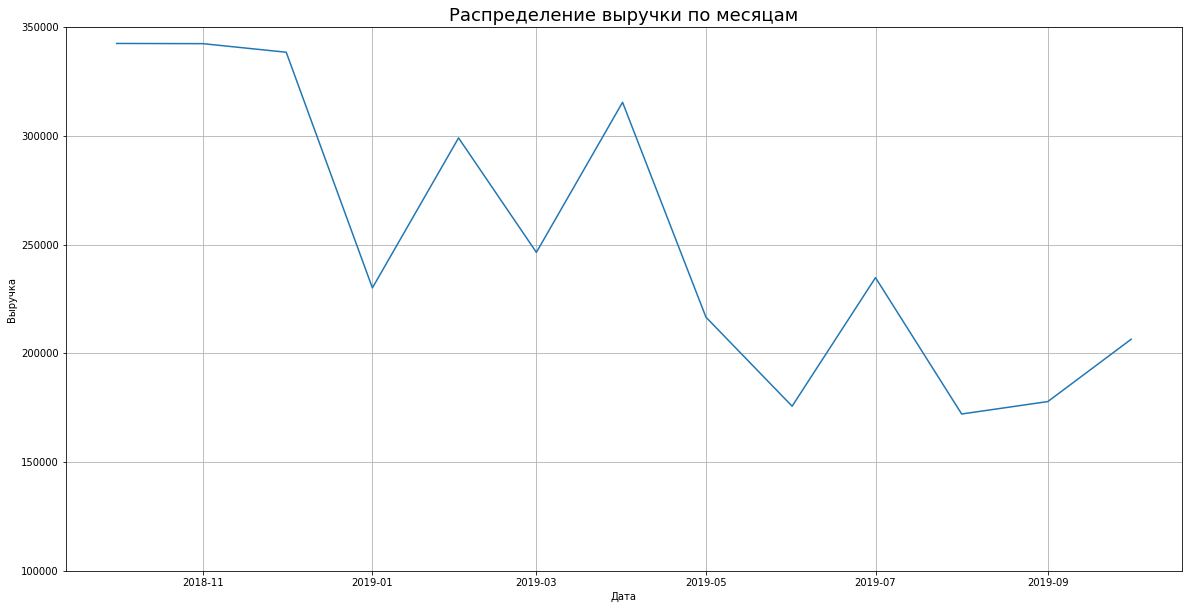

Средняя выручка в месяц: revenue    253690.77
dtype: float64


In [29]:
plt.figure(figsize=(20,10))
b_plot = sns.lineplot(data=df.groupby('order_month').agg({'revenue': 'sum'}).reset_index(), x="order_month", y="revenue")
plt.title('Распределение выручки по месяцам', fontsize=18)
plt.xlabel('Дата')
plt.ylabel('Выручка')
b_plot.set(ylim=(100000, 350000))
plt.grid()
plt.show()
print('Средняя выручка в месяц:', round(df.groupby('order_month').agg({'revenue': 'sum'}).reset_index().mean(), 2))

Возможно, у нас данные с открытия магазина, поэтому первые месяцы были самыми прибыльными (приходили новые клиенты, для них были акции), затем спад после новогодних праздников с небольшим восстановление к началу дачного сезона. Начиная с середины весны, выручка магазина падает и к концу периода остаётся на минимумах.

### Вывод

На данном этапе были получены следующие данные:
- количество клиентов: 2386 и количество заказов: 2747 (небольшая часть клиентов совершила за период несколько заказов);
- количество товаров: 2322;
- общая выручка составила 3 297 980 у.е.;
- в лидеры выбился 1 клиент, который обходит следующие 3 места по сумме выручки;
- анализ продаж во времени показывает сезонность или то, что магазин был открыт в октябре 2018 года (первые несколько месяцев были прибыльными, а потом мы видим спад продаж и нет тенденции к восстановлению).

## Анализ торгового ассортимента

Для того, чтобы определить категории товаров, выделим первые слова из наименований товаров и найдём уникальные слова.

In [30]:
df['name_of_product'] = df['product'].apply(lambda x: x.split(' ')[0])
df.head()

,date,customer_id,order_id,product,quantity,price,revenue,order_month,order_date,first_order_date,name_of_product
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,2018-10-01,комнатное
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,2018-10-01,комнатное
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,2018-10-01,2018-10-01,радермахера
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,2018-10-01,2018-10-01,хризолидокарпус
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,2018-10-01,2018-10-01,циперус


In [31]:
df['name_of_product'].unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'сумка-тележка', 'многолетнее', 'рассада',
       'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка', 'ложка',
       'нож', 'герань', 'ерш', 'пеларгония', 'котел', 'суккулент',
       'эхеверия', 'набор', 'коврик', 'подкладка', 'дозатор', 'ёрш',
       'эвкалипт', 'цветок', 'мусорный', 'плед', 'скатерть', 'кувшин',
       'адиантум', 'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'толкушка', 'тележка', 'готовая',
       'искусственный', 'простыня', 'чайник', 'штора', 'банка', 'стяжка',
       'комплект', 'кампанула', 'декоративная', 'противень', 'калатея',
       'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум',
       'цикламен', 'глоксиния', 'азалия', 'гортензия', 'хризантема',
       'петля', 'салфетка', 'вкладыши

На основе полученных выше слов создадим категории.

In [32]:
# 1 категория - цветы и растения
plants = ['радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка', 'многолетнее', 'рассада', 'герань', 'пеларгония', 
          'суккулент', 'эхеверия', 'эвкалипт', 'цветок', 'адиантум', 'кампанула', 'калатея', 'нолина','хлорофитум', 'цикламен',
          'глоксиния', 'азалия', 'гортензия', 'хризантема', 'мирт', 'цветущее', 'кориандр', 'иссоп', 'сантолина', 'аспарагус', 
          'афеляндра', 'антуриум', 'молодило', 'фиалка', 'гербера', 'душица', 'мелисса', 'роза', 'бегония', 'розмарин',  
          'альбука', 'бальзамин', 'крассула', 'артемизия', 'лаванда', 'мята', 'каланхое', 'примула', 'дендробиум', 'огурец',
          'калоцефалус', 'каллуна', 'капсикум', 'мимоза', 'соланум', 'бархатцы', 'космея', 'морковь', 'настурция', 'цикламен,',  
          'петуния', 'алиссум', 'гвоздика', 'годеция', 'календула', 'капуста', 'кореопсис', 'лапчатка', 'львиный',  'аптения',
          'цинерария', 'эшшольция', 'диффенбахия', 'фаленопсис', 'подсолнечник', 'пуансетия', 'гиностемма', 'ель', 'фикус', 
          'скиммия', 'фиттония', 'тимьян',  'алоэ', 'спатифиллум', 'комнатное', 'кодонанта', 'гимнокалициум', 'кипарисовик', 
          'пуансеттия', 'флокс', 'эхинокактус', 'крокусы', 'гипсофила', 'калибрахоа', 'эпипремнум', 'аквилегия', 'базилик',
          'горох', 'земляника', 'незабудка', 'седум', 'томат', 'укроп', 'нефролепис', 'калла', 'декабрист', 'тюльпан', 
          'гиацинт', 'вербена', 'однолетнее', 'чабер', 'бакопа', 'ранункулус', 'газания', 'овсянница', 'георгина', 'смолевка', 
          'цинния', 'лавр', 'вербейник', 'виола', 'колокольчик', 'котовник', 'эхинацея', 'ясколка', 'лилейник', 'папоротник', 
          'платикодон', 'энотера', 'фуксия', 'цитрофортунелла', 'пеперомия', 'дыня', 'циния', 'синнингия', 'гардения', 'томата', 
          'лобелия', 'табак', 'девичий', 'мускари', 'пиретрум', 'агератум', 'колеус', 'тагетис', 'цинерания', 'муррайя', 
          'портулак', 'астра', 'аргирантерум', 'левкой', 'вероника', 'целозия', 'арбуз', 'баклажан', 'клубника', 'патиссон', 
          'маттиола', 'сальвия', 'лук', 'джункус', 'драцена', 'фатсия', 'хоста', 'гайлардия', 'монарда', 'нивянник', 'рудбекия',
          'барвинок', 'осина', 'сциндапсус', 'бузульник', 'камнеломка', 'солидаго', 'физостегия', 'бадан', 'лен', 'лантана',
          'лаватера', 'анемона', 'буддлея', 'валериана', 'змееголовник', 'любисток', 'петрушка', 'сельдерей', 'шалфей', 'вигна',
          'кабачок', 'тыква', 'хамедорея', 'зверобой', 'мединилла', 'импатиенс', 'клен', 'замиокулькас', 'амариллис', 'салат',
          'пахира', 'литопс', 'пряные', 'кофе', 'подарочный', 'новогоднее', 'подвесное']

# 2 категория - товары для дома
household = ['настенная', 'чехол', 'вешалка', 'сушилка', 'корзина', 'сумка-тележка', 'муляж', 'стяжки',  
             'сумка', 'котел', 'коврик', 'подкладка', 'плед', 'ковер', 'перчатки', 'гладильная', 'двуспальное',
             'тележка', 'искусственный', 'простыня', 'плечики', 'подушка', 'полотенце', 'кофр', 'стиральный', 'щетка',
             'щетка-утюжок', 'светильник', 'ковёр', 'подрукавник', 'контейнер', 'веник', 'ящик', 'вакуумный', 'покрытие', 
             'подголовник', 'короб', 'коробка', 'наматрасник', 'наматрицник-чехол', 'насадка', 'вешалка-плечики', 
             'утюг', 'корыто', 'шнур', 'урна', 'сиденье', 'сметка', 'держатель', 'пробка', 'пододеяльник', 
             'вешалки', 'фен', 'термометр', 'сетка', 'покрывало', 'весы', 'вешалка-сушилка', 'одеяло', 'фоторамка',
             'корзинка', 'доска', 'декоративная', 'настольная', 'ролик', 'сменный', 'скребок', 'ваза', 
             'этажерка', 'простынь', 'ключница', 'складная', 'искусственная', 'совок', 'насадка-отжим', 'пылесос', 'рукав', 
             'окномойка', 'урна-пепельница', 'наматрацник', 'автоматическая', 'бельевые', 'наволочка']

# 3 категория - товары для ванной комнаты
bath = ['ополаскиватель', 'вантуз', 'мыльница', 'халат', 'зубная', 'штора', 'ёрш', 'ерш', 'мыло-скраб', 'отбеливатель', 
        'махровый', 'махровое', 'ванна', 'мыло', 'комплект', 'жидкое', 'средство', 'универсальное', 'ароматизированное',
        'кольца', 'кондиционер', 'гипоаллергенный', 'штанга', 'увлажняющая', 'бак', 'сменная', 'ткань', 'насадка-моп',
        'тряпкодержатель', 'отжим', 'прищепки', 'запасная', 'щётка', 'тряпка', 'таз', 'швабра', 'ведро', 'пена', 'дозатор']

# 4 категория - товары для кухни
kitchen = ['мини-сковорода', 'сковорода', 'стеклянная', 'тарелка', 'вилка', 'ложка', 'нож', 'мусорный', 'скатерть', 'кувшин',
           'толкушка', 'чайник', 'банка', 'противень', 'салфетка', 'вкладыши', 'миксер', 'чистящий', 'tepмокружка', 'лопатка',
           'масленка', 'салатник', 'сервировочная', 'чайный', 'рыбочистка', 'овощеварка', 'терка', 'кружка',  'ножеточка',
           'салфетница', 'стакан', 'столовая', 'чайная', 'овощечистка', 'паста', 'измельчитель', 'губка', 'лоток', 'антижир', 
           'мантоварка', 'ковш', 'кухонные', 'картофелемялка', 'миска', 'жестяная', 'термостакан', 'подставка', 'скалка', 
           'антинакипин', 'сотейник', 'сахарница', 'мерный', 'соковарка', 'пьезозажигалка', 'соковыжималка', 'решетка',
           'кипятильник', 'венчик', 'сито', 'тортница', 'термокружка', 'термос', 'фарфоровая', 'электроштопор', 'столовый', 
           'блюдце', 'бульонница', 'разделочная', 'мантоварка-пароварка', 'орехоколка', 'кухонное', 'хлебница', 'кастрюля', 
           'блюдо', 'набор', 'готовая', 'бальзам', 'рассекатель', 'пресс', 'защитный', 'емкость', 'защитная', 'бензин', 
           'модульная', 'просеиватель', 'нетканые', 'форма', 'концентрат', 'бидон', 'отделитель', 'крышка', 'шприц', 
           'универсальный', 'половник']

# 5 категория - товары для ремонта
renovation = ['крючок', 'щетка-сметка', 'стремянка', 'лестница-стремянка', 'стяжка','петля', 'стремянки', 'сверло-фреза,', 
              'карниз', 'измерительный', 'линейка,', 'петля-стрела', 'шило', 'кисточка', 'комод', 'стремянка-табурет', 'фал', 'сверло',
              'холодная', 'многофункциональный', 'вешалка-перекладина', 'полки', 'лестница', 'крепеж', 'штангенциркуль', 
              'полка', 'фиксатор-шар', 'обувница-3', 'шпагат', 'стеллаж', 'складной', 'веревка', 'мешок', 'завертка', 'ручка', 
              'уголок', 'основание', 'вешалка-стойка', 'шпингалет']

Напишем функцию, которая будет искать слова из списков и записывать в новый столбец 'category' соответствующую категорию товара.

In [33]:
def category (row):
    if row['name_of_product'] in plants:
        return 'Цветы и растения'
    if row['name_of_product'] in household:
        return 'Товары для дома'
    if row['name_of_product'] in bath:
        return 'Товары для ванной комнаты'
    if row['name_of_product'] in kitchen:
        return 'Товары для кухни'
    if row['name_of_product'] in renovation:
        return 'Товары для ремонта'
    else:
        return 'Другое'
   
df['category'] = df.apply(category, axis=1)

Проанализируем полученные категории товаров.

In [34]:
df_category = df.groupby('category').agg({'customer_id':'nunique',
                                          'quantity':'sum', 
                                          'order_id':'nunique',
                                          'product':'nunique',
                                          'price':'mean',
                                          'revenue':'sum'}).round(2).reset_index().sort_values(by='product', ascending=False)

df_category['share'] = (df_category['revenue'] / df_category['revenue'].sum()*100).round(2)
df_category.sort_values(by='revenue', ascending=False)

,category,customer_id,quantity,order_id,product,price,revenue,share
1,Товары для дома,1146,3650,1306,758,1054.23,1911571.0,57.96
4,Цветы и растения,672,4039,777,942,148.08,522801.0,15.85
2,Товары для кухни,323,1531,348,344,470.59,408191.0,12.38
3,Товары для ремонта,127,966,143,109,1285.50,237000.0,7.19
0,Товары для ванной комнаты,200,634,224,169,677.38,218417.0,6.62


Получилось 5 категорий. Самая доходная категория - "Товары для дома" (около 58% выручки магазина), а наименее доходные - "Товары для ванной комнаты" и Товары для ремонта" (около 7% выручки).

При этом самая распространённая категория - "Цветы и растения" (942 наименования), из-за низкой средней цены товара приносит значительно меньше выручки, чем категория "Товары для дома".

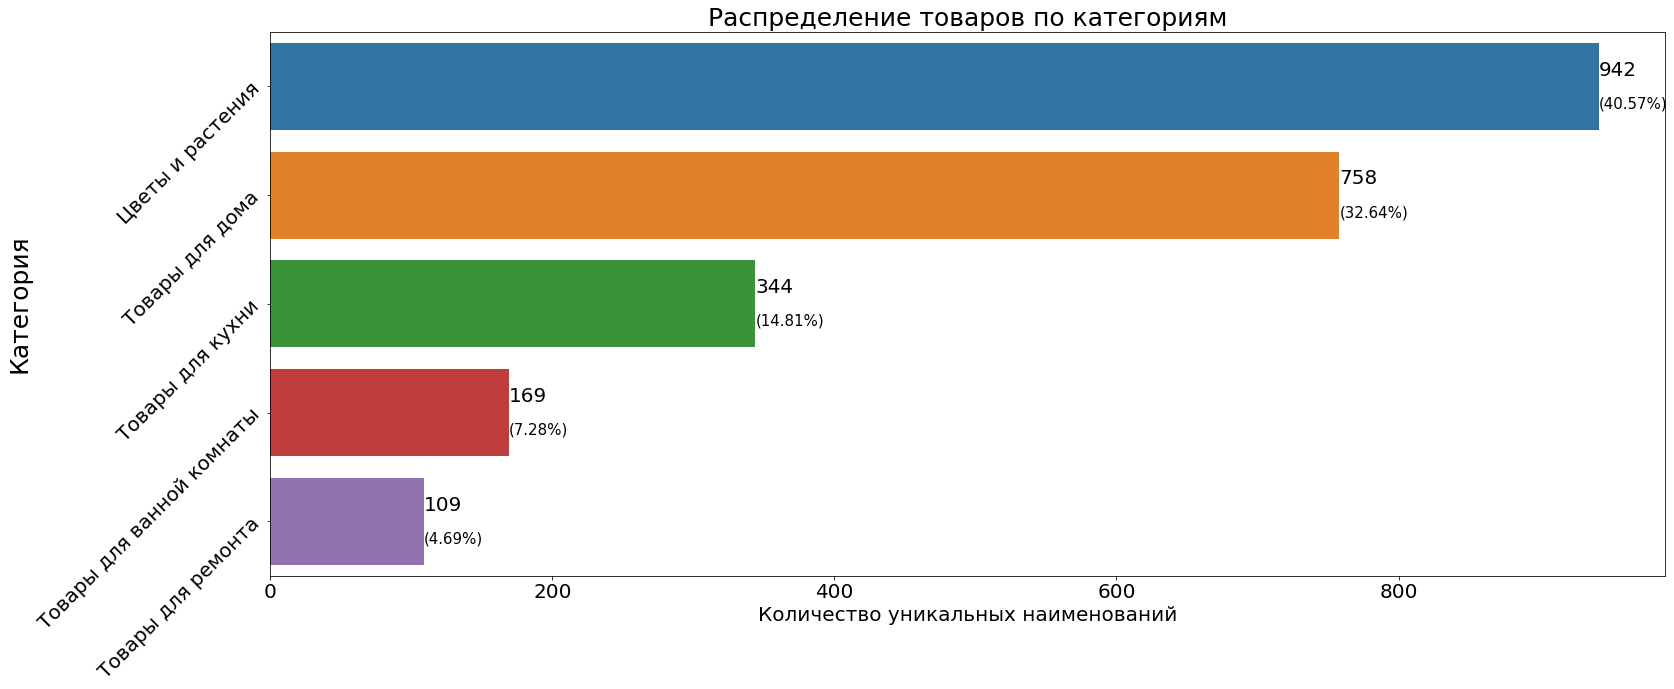

In [35]:
fig, ax = plt.subplots(figsize=(25,10))
plt.title('Распределение товаров по категориям',fontsize=25)
sns.barplot(
    data=df_category,
    x='product',
    y='category')

for i, v in enumerate(df_category['product'].values):
    plt.text(v, i - 0.1, str(v), color='black', fontsize = 20)
    plt.text(v, i + 0.2, '({:.2%})'.format(v / df_category['product'].sum()), color='black', fontsize = 15)
    

plt.xlabel('Количество уникальных наименований', fontsize=20)
plt.ylabel('Категория', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(rotation=45, fontsize=20);

Количество уникальных наименований в каждой категории не одинаковое, по распределению видно, что упор магазина на товары категории "Цветы и растения" и в меньшей степени "Товары для дома", а меньше всего наименований в категории "Товары для ремонта".

In [36]:
date_cat = df.groupby(['order_month', 'category']).agg({'order_id': 'nunique', 'revenue': 'sum'}).reset_index()
date_cat.sort_values(by=['order_month'], ascending=False)[:10]

,order_month,category,order_id,revenue
64,2019-10-01,Цветы и растения,56,17887.0
63,2019-10-01,Товары для ремонта,18,44399.0
62,2019-10-01,Товары для кухни,13,5861.0
61,2019-10-01,Товары для дома,93,125073.0
60,2019-10-01,Товары для ванной комнаты,16,13270.0
57,2019-09-01,Товары для кухни,26,38060.0
55,2019-09-01,Товары для ванной комнаты,12,9688.0
56,2019-09-01,Товары для дома,80,92446.0
58,2019-09-01,Товары для ремонта,11,17884.0
59,2019-09-01,Цветы и растения,50,19739.0


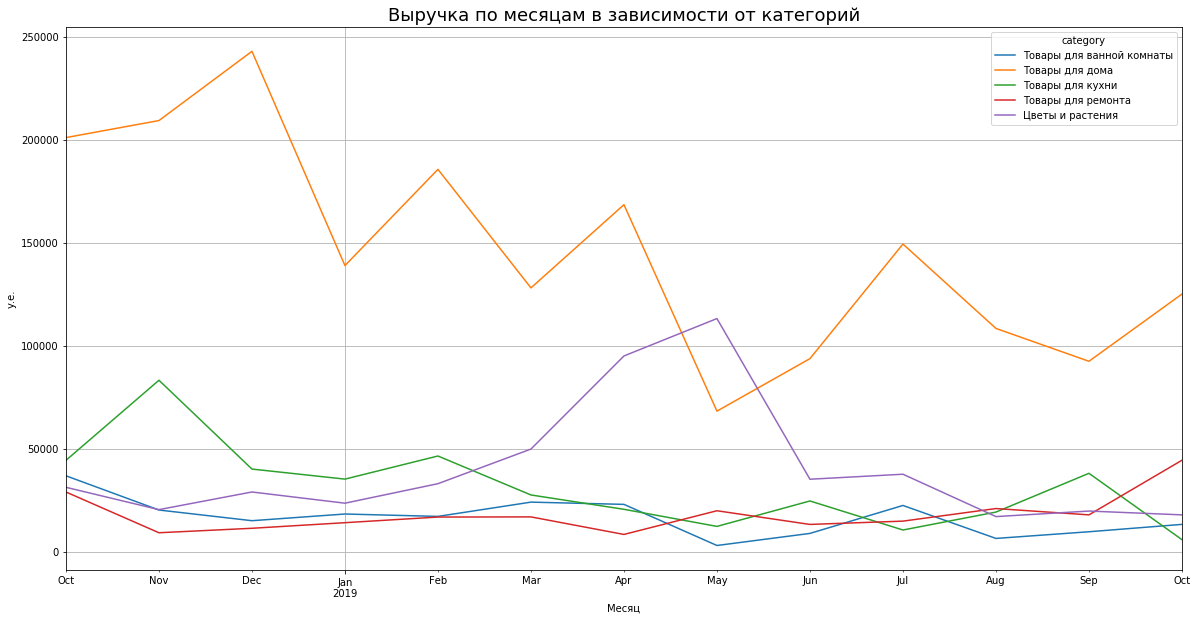

In [37]:
df.pivot_table(
    index='order_month', 
    columns='category', 
    values='revenue', 
    aggfunc='sum').plot(figsize=(20,10))
plt.title('Выручка по месяцам в зависимости от категорий', fontsize=18)
plt.xlabel('Месяц')
plt.ylabel('у.е.')
plt.grid()
plt.show();

Ярко выраженная сезонность у товаров категории "Цветы и растения", рост выручки наблюдается с март по июнь-июль с пиком в мае.
Это объясняется тем, что клиенты готовятся к дачному сезону и самый разгар сезона для того, чтобы сажать растения в мае, а к середине-концу лета покупки клиентов падают и далее выравниваются на одном уровне в течение осени-зимы.

По остальным категориям такой сезонности нет.

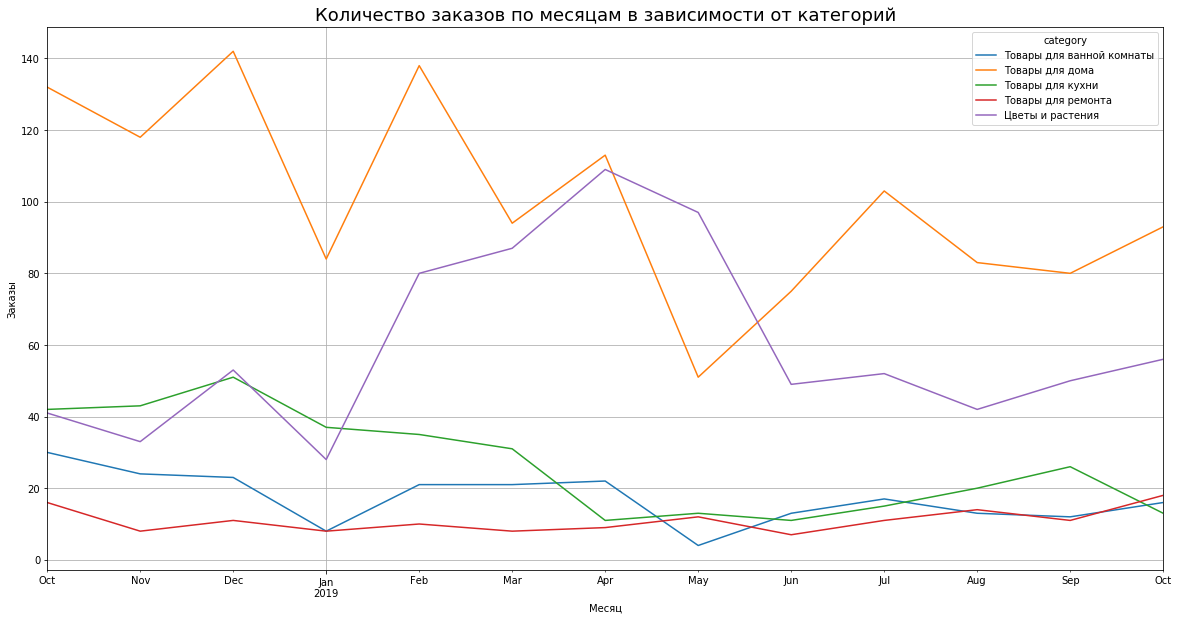

In [38]:
df.pivot_table(
    index='order_month', 
    columns='category', 
    values='order_id', 
    aggfunc='nunique').plot(figsize=(20,10))
plt.title('Количество заказов по месяцам в зависимости от категорий', fontsize=18)
plt.xlabel('Месяц')
plt.ylabel('Заказы')
plt.grid()
plt.show();

По количеству заказов также видна сезонность у товаров категории "Цветы и растения", но при этом рост начинается с февраля и продолжается по июнь-июль с пиком в апреле.
Возможно, зимой проводятся какие-то распродажи и клиенты начинают больше делать покупок, а весной уже готовятся к дачному сезону.

По остальным категориям такой сезонности нет, но для всех остальных категорий наблюдается спад количества заказов, начиная с января-февраля, кроме категории "Товары для ремонта".

Далее перейдём к разделению ассортимента каждой категории на основной и дополнительный.
Для определения основного и дополнительного ассортимента воспользуемся ABC-анализом. Для этого разделим все товары каждой категории на три группы:
- А — наиболее ценные: ~20 % ассортимента и ~80% выручки;
- В — промежуточные: ~30 % ассортимента и ~15% выручки;
- С — наименее ценные: ~50 % ассортимента и ~5% выручки.

Группа A войдёт в категорию основного ассортимента, который необходимо поддерживать постоянно, т.к. большую часть выручки обеспечивают именно эти товары, а товары групп B и C войдут в категорию дополнительного ассортимента - такие позиции можно не держать постоянно на складе, а привозить под заказ.

Создадим датафрейм для каждой категории.

In [39]:
df_plants = df.query('category == "Цветы и растения"')
df_household = df.query('category == "Товары для дома"')
df_bath = df.query('category == "Товары для ванной комнаты"')
df_kitchen = df.query('category == "Товары для кухни"')
df_renovation = df.query('category == "Товары для ремонта"')

Проанализируем ассортимент категории "Цветы и растения".

In [40]:
abc_plants = (
    df_plants
    .groupby('name_of_product')
    .agg({'revenue': 'sum'})
    .sort_values(by='revenue', ascending=False)
    .reset_index()
)

abc_plants['share'] = abc_plants['revenue'] / abc_plants['revenue'].sum() * 100
abc_plants['cum_share'] = abc_plants['share'].cumsum()
abc_plants['qty'] = abc_plants.index + 1
abc_plants['cum_qty'] = abc_plants['qty'] / abc_plants['qty'].nunique() * 100
group_a_plants = abc_plants.head(25)
group_a_plants

,name_of_product,revenue,share,cum_share,qty,cum_qty
0,пеларгония,131793.0,25.209018,25.209018,1,0.490196
1,рассада,61283.0,11.722051,36.931069,2,0.980392
2,петуния,25885.0,4.951215,41.882284,3,1.470588
3,подвесное,20902.0,3.998080,45.880364,4,1.960784
4,спатифиллум,20496.0,3.920421,49.800785,5,2.450980
5,роза,19883.0,3.803168,53.603953,6,2.941176
6,герань,19832.0,3.793413,57.397365,7,3.431373
7,новогоднее,15055.0,2.879681,60.277046,8,3.921569
8,однолетнее,13652.0,2.611319,62.888365,9,4.411765
9,эвкалипт,12894.0,2.466330,65.354695,10,4.901961


В группу A попало 25 товаров, которые составляют около 12% от уникальных товаров.

In [41]:
group_b_plants = abc_plants[25:81]
group_b_plants

,name_of_product,revenue,share,cum_share,qty,cum_qty
25,пуансеттия,3364.0,0.643457,80.101415,26,12.745098
26,фиалка,3338.0,0.638484,80.739899,27,13.235294
27,примула,3175.0,0.607306,81.347205,28,13.725490
28,цитрофортунелла,3074.0,0.587987,81.935191,29,14.215686
29,дендробиум,3064.0,0.586074,82.521265,30,14.705882
30,фуксия,2976.0,0.569241,83.090507,31,15.196078
31,фаленопсис,2839.0,0.543036,83.633543,32,15.686275
32,цикламен,2740.0,0.524100,84.157643,33,16.176471
33,эхинокактус,2475.0,0.473411,84.631055,34,16.666667
34,гвоздика,2401.0,0.459257,85.090312,35,17.156863


В группу B попало 56 товаров, которые составляют около 27% от уникальных товаров.

In [42]:
group_c_plants = abc_plants.tail(123)
group_c_plants

,name_of_product,revenue,share,cum_share,qty,cum_qty
81,цинерания,548.0,0.104820,95.026023,82,40.196078
82,нивянник,525.0,0.100421,95.126444,83,40.686275
83,девичий,525.0,0.100421,95.226865,84,41.176471
84,седум,524.0,0.100229,95.327094,85,41.666667
85,томат,500.0,0.095639,95.422733,86,42.156863
...,...,...,...,...,...,...
199,бархатцы,11.0,0.002104,99.992349,200,98.039216
200,лаватера,11.0,0.002104,99.994453,201,98.529412
201,незабудка,10.0,0.001913,99.996366,202,99.019608
202,морковь,10.0,0.001913,99.998279,203,99.509804


В группу C попало 123 товаров, которые составляют около 61% от уникальных товаров.

Проанализируем ассортимент категории "Товары для дома".

In [43]:
abc_household = (
    df_household
    .groupby('name_of_product')
    .agg({'revenue': 'sum'})
    .sort_values(by='revenue', ascending=False)
    .reset_index()
)

abc_household['share'] = abc_household['revenue'] / abc_household['revenue'].sum() * 100
abc_household['cum_share'] = abc_household['share'].cumsum()
abc_household['qty'] = abc_household.index + 1
abc_household['cum_qty'] = abc_household['qty'] / abc_household['qty'].nunique() * 100
group_a_household = abc_household.head(8)
group_a_household

,name_of_product,revenue,share,cum_share,qty,cum_qty
0,сумка-тележка,593988.0,31.073290,31.073290,1,1.204819
1,сушилка,306626.0,16.040524,47.113814,2,2.409639
2,гладильная,227666.0,11.909890,59.023704,3,3.614458
3,коврик,125141.0,6.546500,65.570204,4,4.819277
4,тележка,103970.0,5.438982,71.009186,5,6.024096
5,чехол,56153.0,2.937531,73.946717,6,7.228916
6,простынь,53232.0,2.784725,76.731442,7,8.433735
7,муляж,45115.0,2.360101,79.091543,8,9.638554


В группу A попало 8 товаров, которые составляют около 10% от уникальных товаров.

In [44]:
group_b_household = abc_household[8:28]
group_b_household

,name_of_product,revenue,share,cum_share,qty,cum_qty
8,вешалка,42236.0,2.209492,81.301035,9,10.843373
9,урна,38618.0,2.020223,83.321258,10,12.048193
10,корзина,24809.0,1.297833,84.619091,11,13.253012
11,одеяло,22129.0,1.157634,85.776725,12,14.457831
12,веник,20678.0,1.081728,86.858453,13,15.662651
13,щетка,20202.0,1.056827,87.915280,14,16.867470
14,контейнер,14623.0,0.764973,88.680253,15,18.072289
15,наматрацник,14196.0,0.742635,89.422888,16,19.277108
16,искусственный,13989.0,0.731806,90.154695,17,20.481928
17,покрывало,13976.0,0.731126,90.885821,18,21.686747


В группу B попало 20 товаров, которые составляют около 24% от уникальных товаров.

In [45]:
group_c_household = abc_household.tail(55)
group_c_household

,name_of_product,revenue,share,cum_share,qty,cum_qty
28,перчатки,4704.0,0.246080,95.186472,29,34.939759
29,подрукавник,4491.0,0.234938,95.421410,30,36.144578
30,этажерка,4489.0,0.234833,95.656243,31,37.349398
31,плед,4369.0,0.228555,95.884798,32,38.554217
32,складная,4272.0,0.223481,96.108280,33,39.759036
33,пылесос,4243.0,0.221964,96.330244,34,40.963855
34,простыня,3559.0,0.186182,96.516425,35,42.168675
35,доска,3448.0,0.180375,96.696801,36,43.373494
36,сметка,3440.0,0.179957,96.876757,37,44.578313
37,настенная,3386.0,0.177132,97.053889,38,45.783133


В группу C попало 55 товаров, которые составляют около 66% от уникальных товаров.

Проанализируем ассортимент категории "Товары для ванной комнаты".

In [46]:
abc_bath = (
    df_bath
    .groupby('name_of_product')
    .agg({'revenue': 'sum'})
    .sort_values(by='revenue', ascending=False)
    .reset_index()
)

abc_bath['share'] = abc_bath['revenue'] / abc_bath['revenue'].sum() * 100
abc_bath['cum_share'] = abc_bath['share'].cumsum()
abc_bath['qty'] = abc_bath.index + 1
abc_bath['cum_qty'] = abc_bath['qty'] / abc_bath['qty'].nunique() * 100
group_a_bath = abc_bath.head(5)
group_a_bath

,name_of_product,revenue,share,cum_share,qty,cum_qty
0,штора,88831.0,40.670369,40.670369,1,2.564103
1,таз,33271.0,15.232789,55.903158,2,5.128205
2,швабра,20794.0,9.520321,65.423479,3,7.692308
3,ведро,16183.0,7.409222,72.832701,4,10.256410
4,комплект,11299.0,5.173132,78.005833,5,12.820513


В группу A попало 5 товаров, которые составляют около 13% от уникальных товаров.

In [47]:
group_b_bath = abc_bath[5:14]
group_b_bath

,name_of_product,revenue,share,cum_share,qty,cum_qty
5,штанга,7792.0,3.567488,81.573321,6,15.384615
6,ёрш,7672.0,3.512547,85.085868,7,17.948718
7,ерш,5323.0,2.437081,87.522949,8,20.512821
8,ткань,5183.0,2.372984,89.895933,9,23.076923
9,бак,3749.0,1.716441,91.612374,10,25.641026
10,халат,1949.0,0.892330,92.504704,11,28.205128
11,махровый,1949.0,0.892330,93.397034,12,30.769231
12,дозатор,1692.0,0.774665,94.171699,13,33.333333
13,мыло,1571.0,0.719266,94.890965,14,35.897436


В группу B попало 9 товаров, которые составляют около 23% от уникальных товаров.

In [48]:
group_c_bath = abc_bath.tail(25)
group_c_bath

,name_of_product,revenue,share,cum_share,qty,cum_qty
14,щётка,1124.0,0.514612,95.405577,15,38.461538
15,махровое,1058.0,0.484395,95.889972,16,41.025641
16,средство,925.0,0.423502,96.313474,17,43.589744
17,ванна,749.0,0.342922,96.656396,18,46.153846
18,тряпка,745.0,0.341091,96.997486,19,48.717949
19,ополаскиватель,734.0,0.336054,97.333541,20,51.282051
20,сменная,712.0,0.325982,97.659523,21,53.846154
21,зубная,656.0,0.300343,97.959866,22,56.410256
22,прищепки,598.0,0.273788,98.233654,23,58.974359
23,гипоаллергенный,539.0,0.246776,98.480430,24,61.538462


В группу C попало 25 товаров, которые составляют около 64% от уникальных товаров.

Проанализируем ассортимент категории "Товары для кухни".

In [49]:
abc_kitchen = (
    df_kitchen
    .groupby('name_of_product')
    .agg({'revenue': 'sum'})
    .sort_values(by='revenue', ascending=False)
    .reset_index()
)

abc_kitchen['share'] = abc_kitchen['revenue'] / abc_kitchen['revenue'].sum() * 100
abc_kitchen['cum_share'] = abc_kitchen['share'].cumsum()
abc_kitchen['qty'] = abc_kitchen.index + 1
abc_kitchen['cum_qty'] = abc_kitchen['qty'] / abc_kitchen['qty'].nunique() * 100
group_a_kitchen = abc_kitchen.head(17)
group_a_kitchen

,name_of_product,revenue,share,cum_share,qty,cum_qty
0,набор,81690.0,20.012690,20.012690,1,1.063830
1,скатерть,67286.0,16.483950,36.496640,2,2.127660
2,тарелка,33619.0,8.236095,44.732735,3,3.191489
3,салфетка,22593.0,5.534909,50.267644,4,4.255319
4,мусорный,22383.0,5.483462,55.751107,5,5.319149
5,чайник,14737.0,3.610320,59.361426,6,6.382979
6,банка,11132.0,2.727155,62.088581,7,7.446809
7,tepмокружка,8996.0,2.203870,64.292451,8,8.510638
8,кружка,8324.0,2.039241,66.331693,9,9.574468
9,чайный,7848.0,1.922629,68.254322,10,10.638298


В группу A попало 17 товаров, которые составляют около 18% от уникальных товаров.

In [50]:
group_b_kitchen = abc_kitchen[17:43]
group_b_kitchen

,name_of_product,revenue,share,cum_share,qty,cum_qty
17,ковш,4568.0,1.119084,80.290109,18,19.148936
18,термокружка,4231.0,1.036525,81.326634,19,20.212766
19,лоток,3772.0,0.924077,82.250711,20,21.276596
20,универсальный,3600.0,0.881940,83.132651,21,22.340426
21,хлебница,3446.0,0.844213,83.976864,22,23.404255
22,соковарка,3373.0,0.826329,84.803193,23,24.468085
23,измельчитель,3353.0,0.821429,85.624622,24,25.531915
24,термос,3282.0,0.804035,86.428657,25,26.595745
25,ложка,3244.0,0.794726,87.223383,26,27.659574
26,столовый,2722.0,0.666845,87.890228,27,28.723404


В группу B попало 26 товаров, которые составляют около 28% от уникальных товаров.

In [51]:
group_c_kitchen = abc_kitchen.tail(51)
group_c_kitchen

,name_of_product,revenue,share,cum_share,qty,cum_qty
43,толкушка,1303.0,0.319213,95.270596,44,46.808511
44,миска,1271.0,0.311374,95.581970,45,47.872340
45,сотейник,1162.0,0.284671,95.866641,46,48.936170
46,блюдце,968.0,0.237144,96.103785,47,50.000000
47,разделочная,920.0,0.225385,96.329169,48,51.063830
48,тортница,824.0,0.201866,96.531036,49,52.127660
49,стеклянная,815.0,0.199661,96.730697,50,53.191489
50,блюдо,786.0,0.192557,96.923254,51,54.255319
51,овощечистка,749.0,0.183493,97.106747,52,55.319149
52,готовая,712.0,0.174428,97.281175,53,56.382979


В группу C попало 51 товаров, которые составляют около 54% от уникальных товаров.

Проанализируем ассортимент категории "Товары для ремонта".

In [52]:
abc_renovation = (
    df_renovation
    .groupby('name_of_product')
    .agg({'revenue': 'sum'})
    .sort_values(by='revenue', ascending=False)
    .reset_index()
)

abc_renovation['share'] = abc_renovation['revenue'] / abc_renovation['revenue'].sum() * 100
abc_renovation['cum_share'] = abc_renovation['share'].cumsum()
abc_renovation['qty'] = abc_renovation.index + 1
abc_renovation['cum_qty'] = abc_renovation['qty'] / abc_renovation['qty'].nunique() * 100
group_a_renovation = abc_renovation.head(7)
group_a_renovation

,name_of_product,revenue,share,cum_share,qty,cum_qty
0,стремянка,68637.0,28.960759,28.960759,1,2.564103
1,полки,58930.0,24.864979,53.825738,2,5.128205
2,стремянки,17658.0,7.450633,61.276371,3,7.692308
3,лестница-стремянка,13528.0,5.708017,66.984388,4,10.256410
4,карниз,11537.0,4.867932,71.852321,5,12.820513
5,щетка-сметка,7708.0,3.252321,75.104641,6,15.384615
6,крючок,6929.0,2.923629,78.028270,7,17.948718


В группу A попало 7 товаров, которые составляют около 18% от уникальных товаров.

In [53]:
group_b_renovation = abc_renovation[7:16]
group_b_renovation

,name_of_product,revenue,share,cum_share,qty,cum_qty
7,стремянка-табурет,5398.0,2.277637,80.305907,8,20.512821
8,вешалка-стойка,5360.0,2.261603,82.567511,9,23.076923
9,полка,5322.0,2.245570,84.813080,10,25.641026
10,комод,5186.0,2.188186,87.001266,11,28.205128
11,стеллаж,4498.0,1.897890,88.899156,12,30.769231
12,шпингалет,4400.0,1.856540,90.755696,13,33.333333
13,петля,3769.0,1.590295,92.345992,14,35.897436
14,крепеж,2340.0,0.987342,93.333333,15,38.461538
15,фал,2099.0,0.885654,94.218987,16,41.025641


В группу B попало 9 товаров, которые составляют около 23% от уникальных товаров.

In [54]:
group_c_renovation = abc_renovation.tail(23)
group_c_renovation

,name_of_product,revenue,share,cum_share,qty,cum_qty
16,стяжка,1944.0,0.820253,95.039241,17,43.589744
17,обувница-3,1912.0,0.806751,95.845992,18,46.153846
18,вешалка-перекладина,1536.0,0.648101,96.494093,19,48.717949
19,складной,1424.0,0.600844,97.094937,20,51.282051
20,лестница,974.0,0.410970,97.505907,21,53.846154
21,завертка,968.0,0.408439,97.914346,22,56.410256
22,измерительный,748.0,0.315612,98.229958,23,58.974359
23,уголок,672.0,0.283544,98.513502,24,61.538462
24,многофункциональный,637.0,0.268776,98.782278,25,64.102564
25,фиксатор-шар,592.0,0.249789,99.032068,26,66.666667


В группу C попало 23 товара, которые составляют около 59% от уникальных товаров.

### Вывод

На данном этапе были получены следующие данные:
- количество выделенных категорий товара - 5;
- товары распределены по категориям неравномерно - больше всего наименований в категории "Цветы и растения", а меньше всего - в "Товары для ремонта";
- самая доходная категория - "Товары для дома" (58% выручки), а наименнее - "Товары для ванной комнаты" (около 7%);
- ярко выраженная сезонность есть только у категории "Цветы и растения" - в период с марта по июнь-июль наблюдается рост числа заказов и выручки. По остальным категориям сезонности нет;
- в зависимости от полученной выручки товары в каждой категории были разделены на основной и дополнительный ассортимент. В группу А входят товары, которые приносят около 80% выручки, и это основной ассортимент магазина, а в группу B и C - товары с выручкой 15% и 5 %, соответственно. 

## Проверка статистических гипотез

Проверим гипотезу о том, что средняя выручка в месяц категории "Товары для ванной комнаты" и категории "Товары для ремонта" различается. Нулевая и альтернативная гипотезы будут следующими: 
- H₀ - средняя выручка в месяц категорий "Товары для ванной комнаты" и "Товары для ремонта" равна.
- H₁ - средняя выручка в месяц категорий "Товары для ванной комнаты" и "Товары для ремонта" различается.

H₀ всегда формулируется так, чтобы использовать знак равенства.
Пороговое значение alpha равно 0.05.

In [55]:
monthly_revenue = df.groupby(['order_month','category'])['revenue'].agg(['sum']).reset_index()
monthly_revenue.head()

,order_month,category,sum
0,2018-10-01,Товары для ванной комнаты,36855.0
1,2018-10-01,Товары для дома,201039.0
2,2018-10-01,Товары для кухни,44358.0
3,2018-10-01,Товары для ремонта,28988.0
4,2018-10-01,Цветы и растения,31271.0


In [56]:
monthly_revenue_bath = monthly_revenue.query('category == "Товары для ванной комнаты"')['sum']
monthly_revenue_renovation = monthly_revenue.query('category == "Товары для ремонта"')['sum']

alpha = 0.05

results = st.ttest_ind(
    monthly_revenue_bath, 
    monthly_revenue_renovation, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, среднемесячные выручки различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу, среднемесячные выручки равны")

p-значение: 0.697429066874566
Не получилось отвергнуть нулевую гипотезу, среднемесячные выручки равны


In [57]:
monthly_revenue.pivot_table(
    index='category', 
    values='sum', 
    aggfunc=['count', 'mean','median']).sort_values(by=[('mean', 'sum')], ascending=False)

,count,mean,median
,sum,sum,sum
category,,,
Товары для дома,13,147043.923077,138903.0
Цветы и растения,13,40215.461538,31271.0
Товары для кухни,13,31399.307692,27544.0
Товары для ремонта,13,18230.769231,16827.0
Товары для ванной комнаты,13,16801.307692,17142.0


Полученное значение p-value говорит о том, что среднемесячная выручка категорий "Товары для ванной комнаты" и "Товары для ремонта" равна. Нам не удалось отвергнуть нулевую гипотезу. Чтобы её подтвердить, можно посмотреть среднее и медианное значения выручки в зависимости от категории. Как мы видим, они отличаются незначительно.

Проверим гипотезу о том, что средний чек клиентов в категории "Товары для дома" и в категории "Цветы и растения" различается. Нулевая и альтернативная гипотезы будут следующими:

- H₀ - средний чек в категориях "Товары для дома" и "Цветы и растения" равен.
- H₁ - средний чек в категориях "Товары для дома" и "Цветы и растения" различается.

H₀ всегда формулируется так, чтобы использовать знак равенства. Пороговое значение alpha равно 0.05.

In [58]:
revenue_per_customer = df.groupby(['customer_id','category'])['revenue'].agg(['sum']).reset_index()
revenue_per_customer.head()

,customer_id,category,sum
0,000d6849-084e-4d9f-ac03-37174eaf60c4,Цветы и растения,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,Товары для дома,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,Товары для ванной комнаты,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,Товары для дома,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,Товары для ремонта,2324.0


In [59]:
revenue_per_customer_plants = revenue_per_customer.query('category == "Цветы и растения"')['sum']
revenue_per_customer_household = revenue_per_customer.query('category == "Товары для дома"')['sum']

alpha = 0.05

results = st.ttest_ind(
    revenue_per_customer_plants, 
    revenue_per_customer_household, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средний чек различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средний чек равен")

p-значение: 6.997371780574846e-10
Отвергаем нулевую гипотезу, средний чек различается


In [60]:
revenue_per_customer.pivot_table(
    index='category', 
    values='sum', 
    aggfunc=['count', 'mean','median']).sort_values(by=[('count', 'sum')], ascending=False)

,count,mean,median
,sum,sum,sum
category,,,
Товары для дома,1146,1668.037522,782.5
Цветы и растения,672,777.977679,412.0
Товары для кухни,323,1263.749226,554.0
Товары для ванной комнаты,200,1092.085000,747.0
Товары для ремонта,127,1866.141732,1574.0


Полученное значение p-value говорит о том, что средний чек в категориях "Товары для дома" и "Цветы и растения" различается. Мы отвергаем нулевую гипотезу. Чтобы это подтвердить, можно посмотреть среднее и медианное значения выручки в зависимости от категории. Как мы видим, они достаточно сильно различаются.

### Вывод

В результате проверки двух гипотез можно сделать следующие выводы:

1) средняя выручка в месяц для категории "Товары для ванной комнаты" равна средней выручке для категории "Товары для ремонта", что подтверждается средним и медианным значениями. Нулевая гипотеза не была отвергнута;

2) средний чек в категории "Товары для дома" и в категории "Цветы и растения" отличается, что подтверждается средним и медианным значениями. Нулевая гипотеза была отвергнута.

Для оценки был использован уровень статистической значимости критерия Стьюдента для независимых выборок. В данном случае критерий задан значением 0.05.

## Дашборд

Ссылка на дашборд: https://clck.ru/XdrKk.

## Общий вывод и рекомендации

По результатам исследования продаж магазина и анализа товарного ассортимента можно сделать следующие выводы и рекомендации:
1) в основном данные корректны (нет пропусков, типы данных верные, нет полных дубликатов), но часть данных выгружена некорректно (были найдены заказы, у которых два и более клиента, а также у которых две и более даты их совершения). После предобработки осталось около 70% от исходных данных;

2) был проведён общий анализ данных: 2386 уникальных клиентов, 2747 уникальных заказов и 2322 уникальных наименований товаров. При этом больше 1 заказа совершила небольшая доля клиентов. Общая выручка за период составила 3 297 980 у.е.;

3) в лидеры выбился 1 клиент, который обходит следующие 3 места по сумме выручки;

4) помесячный анализ продаж показывает сезонность или то, что магазин был открыт в октябре 2018 года (первые несколько месяцев были прибыльными, а потом мы видим спад продаж и нет тенденции к восстановлению);

5) анализ торгового ассортимента позволил выделить 5 категорий товаров: "Товары для дома", "Цветы и растения", "Товары для кухни", "Товары для ремонта" и "Товары для ванной комнаты";

6) больше всего наименований в категории "Цветы и растения" (942), а меньше всего - в "Товары для ремонта" (109). Это свидетельствует о том, что товары распределены по категориям неравномерно;

7) по уровню выручки самая доходная категория - "Товары для дома" (58% выручки), а наименее - "Товары для ванной комнаты" (около 7%);

8) сезонность для всех категорий, кроме "Цветы и растения", не выявлена. Для категории "Цветы и растения" в период с марта по июнь-июль характерен рост числа заказов и выручки. Для большей уверенности необходимо изучить продажи за несколько лет;

9) в зависимости от полученной выручки товары в каждой категории были разделены на основной и дополнительный ассортимент. В группу А входят товары, которые приносят около 80% выручки, и это основной ассортимент магазина, а в группу B и C - товары с выручкой 15% и 5 %, соответственно;

10) в ходе статистического анализа мы проверили две гипотезы с уровнем значимости =0.05:
   - средняя выручка в месяц для категории "Товары для ванной комнаты" равна средней выручке для категории "Товары для ремонта", что подтверждается средним и медианным значениями. Нулевая гипотеза не была отвергнута;
   - средний чек в категории "Товары для дома" и в категории "Цветы и растения" отличается, что подтверждается средним и медианным значениями. Нулевая гипотеза была отвергнута;
   - для оценки был использован уровень статистической значимости критерия Стьюдента для независимых выборок;
    
11) в рамках оптимизации товарного ассортимента и рекомендуется:
   - в первую очередь, проверить, как работает выгрузка данных, возможно, где-то происходит перезапись данных и таким образом мы получаем не совсем корректные данные;
   - создать новое поле в карточке номенклатуры каждого товара, в котором заполнять категорию товара. Это позволит сразу выгружать данные с привязкой к категории и анализировать их по отдельности при необходимости;
   - проверить запас продукции в соответствии с выделенными группами товаров: группа A - товары должны быть всегда в наличии, они приносят максимум выручки для компании, группы B и C - товары могут быть в наличии, но в меньшем количестве или закупаться под заказ, т.к. их большое количество, но выручка от них небольшая.